# Assignment 1: Reddit Data Collection & Visualization


## Overview Instructions
**Data collection** and **data exploration** are integral components of human-centered data science, forming the foundation for all subsequent analyses in the data science cycle. The **data collection** process involves acquiring human centered data from various sources, such as surveys, social media, and sensors. However, ths data is often noisy and messy, making it challening to interpret patterns due to outliers, missing values, or unstructed formats. **Data exploration**, on the other hand, bridges the gap between raw data and meaningful insights. It helps identify and address noisy outliers while revealing the underlying patterns, trends, and anomalies that are crucial to understanding the characteristics of the dataset.  

This assignment builds on those principles by guiding you through collecting and analyzing Reddit data, a rich source of human-generated information. By engaging with real-world social media data, you will gain insights into the complexities of working with human-centered data and develop skills that are central to understanding and addressing societal questions through data science.

Follow this Jupyter notebook through the process of data exploration and preprocessing; fill in any implementation parts marked with **`TODO`** comment blocks and read/understand the provided pipeline for better understanding.

Trough this assignment, you will learn **1. How to build a Reddit scraper using the Reddit data API; 2. Perform visualization and analysis on the collected data.** The goal of this assignment is for you to familiarize yourself with some of the common tools and how to use them on real-world data.

## Reddit Background
[Reddit](https://www.reddit.com/) is a social network of communities where people can dive into their interests, hobbies, and passions. Registered users can post content (e.g., links, text posts, images, and videos) to the site. The posts can then be voted up or down by other members. Posts are organized by subject into user-created boards called "communities" or "subreddits". According to [Semrush](https://www.semrush.com/website/reddit.com/overview/), as of July 2022, Reddit ranks as the 10th most-visited website in the world and the 6th most-visited website in the U.S. The public Reddit data can be accessed by authorized applications on Reddit. Additionally, Reddit’s official API allows free and easy collection of post titles, content, comments, and other metadata, providing a rich and versatile resource for researchers and learners interested in human centered data science.




## 0. **WARM-UP [5 pt]**

Open Authentication (OAuth) on Reddit. Here is the reference for more details about OAuth on [Reddit](https://github.com/reddit-archive/reddit/wiki/OAuth2). Most Reddit API functions can be accessed by registered applications (e.g., the crawlers you will develop in this assignment) through OAuth 2.0. To register your application, you first need to have a Reddit account. If you already have one, you can directly use it. Otherwise, you will need to [create an account on Reddit](https://www.reddit.com/register/). Then, create an application and obtain the keys (i.e., a pair of Client ID and Client Secret).

The main steps for the above registration are summarized below: Go to [https://www.reddit.com/prefs/apps/](https://www.reddit.com/prefs/apps/), and create a new Reddit application for this assignment by clicking "create an app" at the bottom. Select "script" and fill in all required fields. You can pick a name of your choice for the application. For the URL and redirect URI, you can either use your own homepage or simply type the HTTP address of your machine. Submit the form, record the Client ID (next to your app icon under "developed applications") and Client Secret (in the "secret" section) from the screen, and use them in your application (i.e., crawlers).

In this assignment, we introduce [PRAW (A Python Reddit API Wrapper)](https://praw.readthedocs.io/en/stable/getting_started/installation.html). PRAW is a Python API wrapper that allows easy access to Reddit APIs. Building upon our code skeleton, we aim to collect a JSON file of subreddits with given keywords and filters.



In [18]:
# Install praw
#!pip install -U praw
# using conda so not needed
!pip show praw

Name: praw
Version: 7.8.1
Summary: Python Reddit API Wrapper.
Home-page: 
Author: 
Author-email: Bryce Boe <bbzbryce@gmail.com>
License: 
Location: /home/noel/.local/share/virtualenvs/IS597-QtCdqPAq/lib/python3.12/site-packages
Requires: prawcore, update_checker, websocket-client
Required-by: 


#### 0.1 **Test API Access [5 pt]**
First, test your API access and secrets. Enter the authentication credentials (Client ID and Client Secret) you obtained from your Reddit application. You should see an output of `{"*"}` indicating read-only authorization. You may choose any `user_agent` you want.


In [19]:
import praw
client_id_global='Q140LzVBMeNeVXubMEA9cg'
client_secret_global='tLUkxHIpHcR833QVF47ZNVrckRLCAg'

# ===========================================
# TODO (0.1): load subjects into a pandas dataframe
# TEST out your api keys(client_id and client_secret):
reddit = praw.Reddit(
    client_id=client_id_global,
    client_secret=client_secret_global,
    user_agent="."
)

print(reddit.auth.scopes())
# ===========================================
# For read-only authorizations this should return {"*"}.

{'*'}


## 1: **Data Collection [40 pt]**
Posts on Reddit are organized by their subject (i.e., subreddit). In each subreddit, users can retrieve a list of Reddit posts based on a sorting criterion. Examples of the sorting criteria include hot, new, and rising. Reddit provides APIs to collect posts in a specified subreddit based on a specified sorting criterion. Returned posts will be stored in the JSON format where each post contains a list of attributes.

In the following code, you will instantiate a `Reddit` object, and use it to gain access to the `subreddit` you want. Then, data can be retrieved by calling the methods under the `subreddit` object. More information about the available attributes can be found here: [subreddit](https://praw.readthedocs.io/en/stable/code_overview/models/subreddit.html).

In this exercise, you will build a small data scraper using PRAW that is able to the following tasks.




### 1.1 **Fetch Hot Subreddits of a Reddit [5 pt]**
Use the `subreddit.hot` method provided in `praw` to fetch the hottest subreddits under all of Reddit. Read the documentation and explore the usage of this method.


### 1.2 **Search Subreddits Based on Keywords Ordered by Relevance [10 pt]**
Search the subreddits under the Reddit 'uiuc' by relevance, and provide your top 5 search results. For your results, break down the attributes and the resulting structure as dictionary objects. Read the documentation and explore the usage of this method.

### 1.3 **Search Subreddits Based on Keywords Ordered by Time [5 pt]**
Building on your implementation from 1.2, order your results by time instead of relevance. Report the top 5 search results.

### 1.4 **Add Time Filter to Your Keyword Search [5 pt]**
Add a time filter to your implementation, and filter and report the subreddits from the recent month.

### 1.5 **Collect Reddit Data Around a Topic, and Examine the Collected Data [15 pt]**
Use your `search_subreddit` method to search 'all' Reddit with a *keyword of your choice* sorted by a filter of your choice [10 pt]. What insights are you able to draw from qualitatively analyzing the collected data [5 pt]?

In [25]:
import praw
import time


class Scraper:
    def __init__(self):
        # Init scraper with your credentials.
        self.reddit = praw.Reddit(
            client_id=client_id_global,
            client_secret=client_secret_global,
            user_agent=".",
            check_for_async=False
        )


    def hot_subreddit(self, reddit, num):
        """
        Fetch hottest subreddits under a reddit
        Args:
          reddit (str): name of your reddit
          num (int): number of subreddits you would like to retrieve
        Return:
          fetched_subreddits (): a list of subreddits collected
        """

        # ===========================================
        # TODO (1.1): fetch hostest 5 subreddits under the reddit "uiuc"
        print(f"reddit={reddit}")
        print(f"num={num}")
        fetched_subreddits = self.reddit.subreddit(reddit).hot(limit=num)
        return fetched_subreddits
        # ===========================================
    
    def search_subreddit(self, reddit, keyword, time_filter='all', sort_method='relevance', limit=5):
        """
        Search subreddits based on keywords
        Args:
          reddit (str): name of your reddit
          keyword (str): keyword for searching
          time_filter (str): Time filter(past), day, year, month ...
        Return:
          fetched_subreddits (List of subreddits): a list of subreddits collected
        """
        data = []
        # ===========================================
        # TODO (1.2, 1.3, 1.4): build your keyword search method with different filters and orderings
        # 1. loop through your search results
        # 2. unpack instances in looped posts
        # 3. unpack comments with another for loop
        # 4. append to data
        # ===========================================
        submissions = self.reddit.subreddit(reddit).search(keyword, sort = sort_method, time_filter = time_filter, limit=limit)
        for submission in submissions:
            submission_dict = {
                'sort_method':sort_method, 'time_filter':time_filter,
                'subreddit':submission.subreddit.display_name, 'title':submission.title,
                'score':submission.score, 'upvote_ratio':submission.upvote_ratio,
                'num_comments':submission.num_comments, 
                              }
            
            submission_dict['comments'] = []
            submission.comments.replace_more(limit=None)  #
            submission_dict['comments'] = [comment.body for comment in submission.comments.list()]

            # submission.comments.replace_more(limit=None)
            # for comment in submission.comments.list():
            #     submission_dict['comments'].append(comment.body)

            data.append(submission_dict)

        return data

def print_data(data):
    for submission in data:
      print("_______________________________")
      print(f"sort_method={submission['sort_method']}, time filter={submission['time_filter']}")
      print(f"Subreddit: {submission['subreddit']}")
      print(f"Title: {submission['title']}")

      print(f"Score = {submission['score']}")
      print(f"Up vote ratio = {submission['upvote_ratio']}")
      print(f"Number of comments = {submission['num_comments']}")
      print("_______________________________")

# ===========================================
# TODO: Provide your printed results here
keywords = "uiuc"
scraper = Scraper()

print("1.1 - Fetch Hot Subreddits of a Reddit")
for submission in scraper.hot_subreddit("all", 5):
  print(submission.title)

print("1.2 - Search Subreddits Based on Keywords Ordered by Relevance")
data = scraper.search_subreddit("uiuc", keywords, sort_method='relevance')
print_data(data)

print("1.3 - Search Subreddits Based on Keywords Ordered by Time")
data = scraper.search_subreddit("uiuc", keywords, sort_method='new')
print_data(data)

print("1.4 - Add Time Filter to Your Keyword Search")
data = scraper.search_subreddit("uiuc", keywords, sort_method='new', time_filter='month', limit=5)
print_data(data)

# ===========================================
# TODO 1.5: Your exploration code
print("1.5 - Collect Reddit Data Around a Topic, and Examine the Collected Data")
keywords = 'clans of caledonia'
data = scraper.search_subreddit("all", keywords, sort_method='new', time_filter='all', limit=8)
print_data(data)
data = scraper.search_subreddit("all", keywords, sort_method='top', time_filter='all', limit=8)
print_data(data)
data = scraper.search_subreddit("all", keywords, sort_method='comments', time_filter='all', limit=8)
print_data(data)
data = scraper.search_subreddit("all", keywords, sort_method='new', time_filter='month', limit=8)
print_data(data)
data = scraper.search_subreddit("all", keywords, sort_method='top', time_filter='month', limit=8)
print_data(data)
data = scraper.search_subreddit("all", keywords, sort_method='comments', time_filter='month', limit=8)
print_data(data)

# ===========================================

1.1 - Fetch Hot Subreddits of a Reddit
reddit=all
num=5
Federal employees told to justify jobs in email or Musk says they face dismissal
Meeting between a child in Ku Klux Klan robes and a black patrolman, 1992
Current Situation At The Lincoln Memorial In DC
The dress my mom is planning to wear to my wedding. She sent this to me yesterday and I still haven’t replied
A man rescued an otter after it was orphaned when its mother had an accident. He accompanied it throughout its entire rehabilitation process and later released it into a lake, where it approaches him to greet him every time he visits
1.2 - Search Subreddits Based on Keywords Ordered by Relevance
_______________________________
sort_method=relevance, time filter=all
Subreddit: UIUC
Title: UIUC has gotten pickier?
Score = 0
Up vote ratio = 0.44
Number of comments = 29
_______________________________
_______________________________
sort_method=relevance, time filter=all
Subreddit: UIUC
Title: What is your hot take about UIUC?


**TODO 1.5**: (Double click this text block to edit it) What insights are you able to draw from qualitatively analyzing the collected data [5 pt]? For example, what initial patterns, themes, or anomalies were observed in the collected data? Are there any potential limitations or biases in the collected data that might impact the analysis? Add your interpretation here by editing this text block

My search was about a board game call Clans of Caledonia (https://boardgamegeek.com/boardgame/216132/clans-of-caledonia). Caledonia is a name of Scotland. I found it interesting that the vast majority of the subreddits returned were related to board games. I was searching for information about the board game but I found it interesting that the keyword "clans of caledonia" yielded mostly board game reddits like r/boardgames, r/BoardGameExchange, and r/boardgamearena. The most popular reddit post of all time also fall under a board game related reddit. We can clearly see a bias in the search results for the board game instead of the actual historical clan of Scotland (Caledonia) (history of the actual clans of Caledonia can be found here: https://www.electricscotland.com/history/anicient_caledonians.htm). This bias shows that the 2017 board game Clans of Caledonia has much more popularity on Reddit than the a historical clans in Scotland. The hottest, most comments, and top post over the last month and all time favors the board game over the historical clans. We do see that some of the top post of all time include subreddits from the r/u_Cloverskeeper and r/CrusaderKings. These subreddits stem from the PC game call Crusader Kings by Paradox Interactive. 
I do not find surprising that Reddit users prefer talking about the board game over the historical clans. Although, it is important to recognize that Reddit users bias.  

## 2. **Data Exploration [40 pt]**

In order to gain a deeper understanding of our collected data, we will carry out a series of data explorations. Starting with a holistic analysis, we aim to have an overall view of the data we collected. How many posts are there, and how many comments are associated with these posts? These details can be easily fetched with the guidance of the data structure of our raw collected data.

Additionally, in text mining, frequency-based analyses are fundamental for understanding patterns, trends, and distributions within text data. In this exercise, we explore some commonly considered analysis tools based on our previously constructed meta-text.

[NLTK](https://www.nltk.org/) is a leading platform for building Python programs to work with human language data. It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along with a suite of text processing libraries for classification, tokenization, stemming, tagging, parsing, and semantic reasoning, plus wrappers for industrial-strength NLP libraries, and an active discussion forum.

We will use the NLTK library to conduct the following analysis:


### 2.1 **Statistical analysis, Data exploration [5 pt]**
For the data collected from '1.5', report the number of comments and posts.



In [26]:
# ===========================================
# TODO (2.1): Print out the number of comments and posts
print(f"Total submissions collected: {len(data)}")

total_comments = 0
for submission in data:
    print(f"Comments for submission \'{submission['title']}\': {submission['num_comments']}")
    total_comments += submission['num_comments']
    
print(f"Total comments: {total_comments}") 
# ===========================================

Total submissions collected: 7
Comments for submission 'Games where you supply other players': 54
Comments for submission 'Civilization and/or deck building and/or resource management solo recommendations': 26
Comments for submission '[FS] [Indianapolis, IN 46220] Pitchcar, Skyrise, Dead Reckoning, Stockpile': 17
Comments for submission 'I literally JUST opened the app…': 17
Comments for submission 'Looking for people to learn new games with': 14
Comments for submission '[US-MI][H] massive zombicide collection, last light, dead reckoning, folklore collection [W] $ / few trade': 2
Comments for submission 'PA[17236] - FS Clans of Caledonia w/ metal coins, SETI: Search For Extraterrestrial Intelligence': 2
Total comments: 132



### 2.2 **Wordcloud [10 pt]**
A *Word Cloud* is a visual representation of text data, where the importance of each word is indicated by its size or color. It is one of the most widely adopted tools for initial data analysis. Word clouds can be a fun way to visualize the frequency of words in text. An easy way to generate a word cloud is to use the `wordcloud` library in Python. It can be installed easily via `pip install wordcloud`.


In [22]:
# Install word cloud
#!pip install wordcloud
#!pip wordcloud show version

In [28]:
meta_text = []
for submission in data:
  meta_text.append(submission['title'])
  #meta_text.extend([c['body'] for c in submission['comments']])
  meta_text.extend(submission['comments'])
text = " ".join(meta_text)

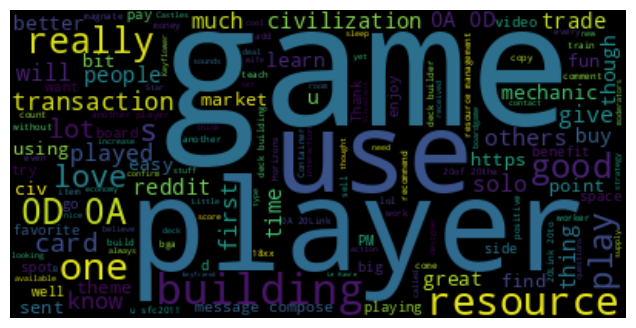

In [29]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# ===========================================
# TODO (2.2): Show wordcloud of your collected data
wordcloud = WordCloud().generate(text)

# Display the generated image
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
# ===========================================


### 2.3 **Word Frequencies [15 pt]**
Identifying the most common words (top 5) in a text can reveal key themes or subjects. This is often visualized with word clouds or frequency distributions [10 pt]. What insights do you gain by observing the results of the word cloud and word frequency histogram [5 pt]?

In [ ]:
import nltk
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import matplotlib.pyplot as plt

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# ===========================================
# TODO (2.3): Fetch the most frequent words and their occurences
# 1. Tokenize and remove stopwords
tokens = nltk.word_tokenize(text)
# converts the words in word_tokens to lower case and then checks whether 
#they are present in stop_words or not
#source: https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
stop_words = set(stopwords.words('english'))
filtered_sentence = [w for w in tokens if not w.lower() in stop_words]
# 2. Count word frequencies
word_freqs = None

# 3. Most common words
most_common_words = None
# ===========================================
print(word_freqs)
print(most_common_words)

# Visualization
words, frequencies = zip(*most_common_words)
plt.bar(words, frequencies)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 5 most common words')
plt.show()

[nltk_data] Downloading package punkt to /home/noel/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /home/noel/nltk_data...


None
None


[nltk_data]   Unzipping corpora/stopwords.zip.


TypeError: zip() argument after * must be an iterable, not NoneType

**TODO 2.3**: (Double-click this text block to edit) What insights do you gain by observing the results of the word cloud and word frequency histogram? Are the high-frequency words in the post close to the topic you want to search for [5pt]? Add your interpretation here by editing this text block

### 2.4 **N-gram analysis [10 pt]**
*N-gram Frequencies*: Beyond single words, examining the frequency of n-grams (sequences of n words) can uncover common phrases or expressions, providing insight into writing style, recurring patterns, or topical phrases.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Most common n-grams: [(('Thanks', '.', 'Congratulations', 'to'), 3), (('.', 'Congratulations', 'to', 'you'), 3), (('and', 'welcome', 'to', 'the'), 2), (('!', '!', '!', 'Congratulations'), 2), (('congrats', '!', 'Congratulations', '!'), 2), (('when', 'did', 'you', 'apply'), 2), (('?', 'Congratulations', '!', '!'), 2), (('!', 'Congratulations', '!', '!'), 2), (('!', 'I', 'also', 'got'), 2), (('Oh', 'sure', '.', 'My'), 2)]


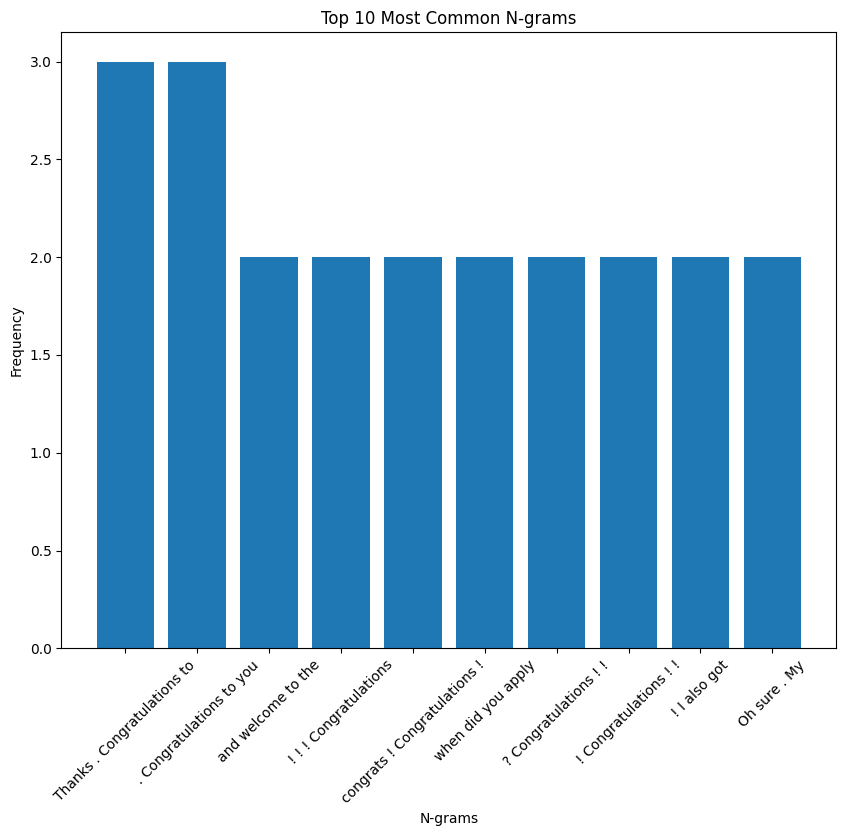

In [ ]:
from nltk import ngrams
from collections import Counter


nltk.download('punkt')
tokens = word_tokenize(text)

# Specify the number of n for n-grams (e.g., 2 for bigrams, 3 for trigrams, etc.) You may try different values for n.
n = 4
# ===========================================
# TODO (2.4): generate N-grams and visualize the top 10 frequent combinations
# 1. Generate N-grams

# 2. Display the most common n-grams

# ===========================================

# Visualization
ngrams, frequencies = zip(*most_common_ngrams)
ngrams = [' '.join(ng) for ng in ngrams]  # Convert tuple n-grams to strings for plotting
plt.figure(figsize=(10, 8))
plt.bar(ngrams, frequencies)
plt.xlabel('N-grams')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common N-grams')
plt.xticks(rotation=45)
plt.show()

## 3. **Network Analysis [15 pt]**

The user comments collected in the previous tasks can be represented as a directed graph, where the nodes are the posts and comments, and the edges are the links that connect pairs of comment nodes. There are several important graph properties that can be measured to examine the network structure of the user comments. Examples of these graph properties include the order of the graph (i.e., the number of nodes), the size of the graph (i.e., the number of edges), the comment node with the highest degree (i.e., the node with the highest number of edges connected to it), and the diameter of the graph (i.e., the longest of the shortest path lengths between node pairs). More information on graph properties can be found [here](https://en.wikipedia.org/wiki/Graph_property). All of these properties can be measured with the NetworkX library. In addition, NetworkX also provides [basic plotting functionality](https://networkx.org/documentation/stable/reference/drawing.html) for visualizing graphs, where you will be able to visualize the network structure of the user comments.


### 3.1 **Visualize the Network Structure [15 pt]**

Construct a directed graph visualization using `networkx` and `matplotlib`. Represent each post as a node in our graph, with comments under this post defined as child nodes. This network visualization will illustrate the comment structures of posts. Use the collected post ID and comment ID as node IDs.


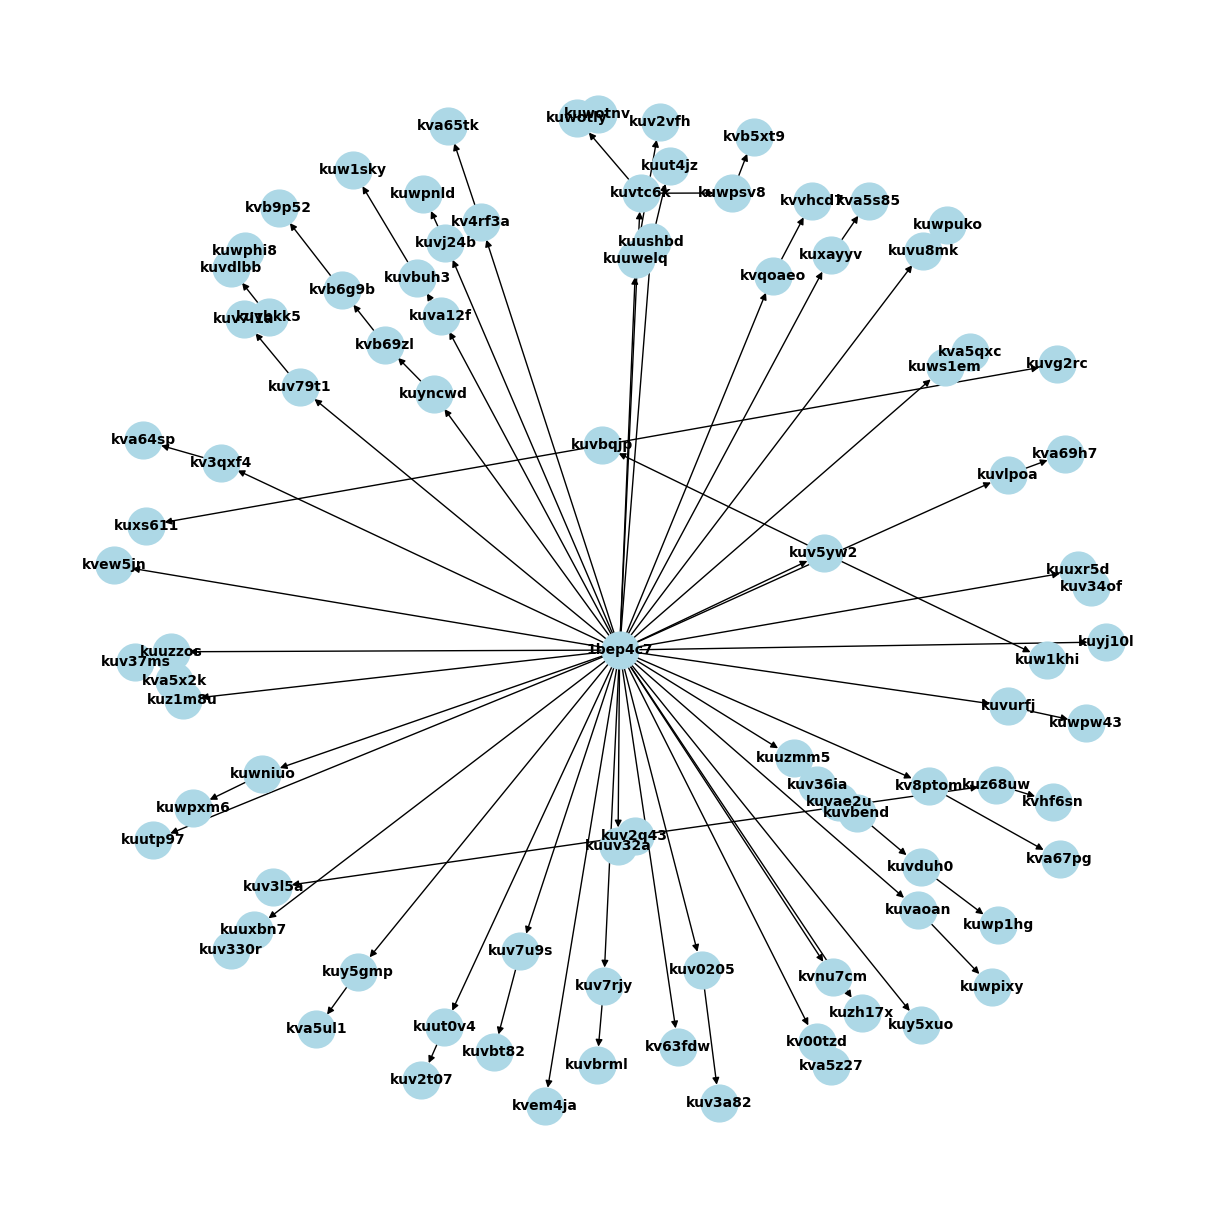

In [ ]:
import networkx
import networkx as nx
import matplotlib.pyplot as plt


# ===========================================
# TODO (3.1): visualize the comment
# 1. Create a directed graph
G = None

# 2. Add nodes and edges based on your data structure

plt.figure(figsize=(12, 12))
nx.draw(G, with_labels=True, node_size=700, node_color="lightblue", font_size=10, font_weight="bold")
plt.show()
# ===========================================